# <font color='red'>Implement Optimizers to Update Weights</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, these are the test functions.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import math
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)

X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>

*
    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

# <font color='red'> Optimizers </font>

* We will be implementing 3 type of optimizers(methods to update weight)
* Using the same computational graph mentioned above
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

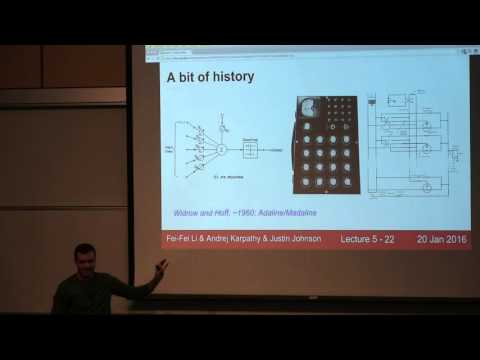

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="950",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weights with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below Weights Update Strategies</b>


*  <b>Strategy 1</b>: We will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Strategy 2</b>: We will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Strategy 3</b>: We will be implementing the above algorithm with <b>Adam update</b> of weights


# <font color='red'> 1 </font>

## <font color='blue'>Forward propagation </font>

In [28]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    return 1 / (1 + np.exp(-z))

def tanh(z):
    '''In this function, we will compute the tanh(z)'''
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        
        # Return the following variables
        # exp = part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh = part2 (compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3 (compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig variables
        
        #print("%"*100, w)
        # exp
        mul1 = w[0] * x[0]; mul2 = w[1] * x[1]
        add1 = mul1 + mul2; add2 = mul1 + mul2
        mul3 = add1 * add2
        add3 = mul3 + w[5]
        exp_ = np.exp(add3)
        
        # tanh
        tanh_ = tanh(exp_ + w[6])
        
        # sigmoid
        sin_ = np.sin(w[2] * x[2])
        add4 = (w[3]*x[3]) + (w[4]*x[4])
        mul4 = sin_ * add4
        sig_ = sigmoid(mul4 + w[7])
        
        y_hat = tanh_ + (sig_ * w[8])
        l = (y-y_hat)**2
    
        dl = 2*(y-y_hat)*-1
        
        d = {"dl":dl, "loss":l, "exp":exp_, "tanh":tanh_, "sigmoid":sig_, "sin":sin_, 
             "mul1":mul1, "mul2":mul2, "add1":add1, "add2":add2, "add4":add4}
        #print("%"*100, d)
        return d

<font color='cyan'>Grader function - 1</font>

In [29]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [30]:
def grader_forwardprop(data):
    dl = (np.round(data['dl'],4)==-1.9285)
    loss = (np.round(data['loss'],4)==0.9298)
    part1 = (np.round(data['exp'],4)==1.1273)
    part2 = (np.round(data['tanh'],4)==0.8418)
    part3 = (np.round(data['sigmoid'],4)==0.5279)
    assert(dl and loss and part1 and part2 and part3)
    return True
w = np.ones(9)*0.1
d1 = forward_propagation(X[0],y[0],w)
#print(d1)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [31]:
def backward_propagation(x,w,dic):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    
    # compute the gradients of each weight [w1, w2, w3, ..., w9]
    # use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9

    # return dW, dW is a dictionary with gradients of all the weights
    #print("^"*100, w)
    
    dW = dict()
    dW['dw9'] = (dic['dl'] * dic['sigmoid'])
    dW['dw8'] = ((dic['sigmoid'] * (1-dic['sigmoid']))) * (w[8] * dic['dl'])
    dW['dw7'] = (1 - (dic['tanh']**2)) * dic['dl']
    dW['dw6'] = (dic['exp'] * dW['dw7'])
    dW['dw5'] = (dW['dw8'] * dic['sin']) * x[4]
    dW['dw4'] = (dW['dw8'] * dic['sin']) * x[3]
    dW['dw3'] = (math.cos(dic['sin']) * (dW['dw8'] * dic['add4'])) * x[2]
    dW['dw2'] = ((dW['dw6'] * dic['add1']) * x[1]) + ((dW['dw6'] * dic['add2']) * x[1])
    dW['dw1'] = ((dW['dw6'] * dic['add1']) * x[0]) + ((dW['dw6'] * dic['add2']) * x[0])
    
    #print(dW)
    return dW    
    

<font color='cyan'>Grader function - 3 </font>

In [32]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],4)==-0.2297)
    dw2=(np.round(data['dw2'],4)==-0.0214)
    dw3=(np.round(data['dw3'],4)==-0.0056)
    dw4=(np.round(data['dw4'],4)==-0.0047)
    dw5=(np.round(data['dw5'],4)==-0.001)
    dw6=(np.round(data['dw6'],4)==-0.6335)
    dw7=(np.round(data['dw7'],4)==-0.5619)
    dw8=(np.round(data['dw8'],4)==-0.0481)
    dw9=(np.round(data['dw9'],4)==-1.0181)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
#print(d1)
d1=backward_propagation(X[0],w,d1)
#print(d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [33]:
# Ref: https://cs231n.github.io/neural-networks-3/
def gradient_checking(x, y, w_, e):
    d_ = forward_propagation(x, y, w_)
    gr = backward_propagation(x, w_, d_)
    gr = list(gr.values())
    
    approx_gradients = []
    for wi in range(len(w_)):
        wi_plus = np.copy(w_)
        wi_plus[wi] = wi_plus[wi]+e
        dwi_plus = forward_propagation(x, y, wi_plus)
        
        wi_minus = np.copy(w_)
        wi_minus[wi] = wi_minus[wi]-e
        dwi_minus = forward_propagation(x, y, wi_minus)
        
        approx_gr = (dwi_plus['loss'] - dwi_minus['loss']) / (2*e)
        approx_gradients.append(approx_gr)
        
    '''
    num = np.linalg.norm(np.array(gr) - np.array(approx_gradients))
    den = max(np.linalg.norm(gr) , np.linalg.norm(approx_gradients))
    diff = num / den
    '''
    diff_ = []
    for g, a in zip(gr[::-1], approx_gradients):
        diff = (g-a) / (g+a)
        diff_.append(diff)
        
        if diff < e:
            print("The gradient is correct", g, a, diff)
        else:
            print("The gradient is wrong", g, a, diff)
    
    return diff_
    

In [34]:
W = np.random.normal(0, 0.1, 9)
e = 0.0001

In [35]:
gradient_checking(X[0], y[0], W, e)

The gradient is correct -0.06336092378476448 -0.06336092270520233 8.519147865283226e-09
The gradient is correct -0.005904266505548416 -0.005904266507927858 -2.0150192464427818e-10
The gradient is correct -0.00014417929313551882 -0.00014417921967435632 2.5475635098979514e-07
The gradient is correct -0.00027710529750597367 -0.0002771052975969468 -1.6414902254223805e-10
The gradient is correct -5.995037866765921e-05 -5.995037688499849e-05 1.4867802190861331e-08
The gradient is correct -0.6116783187078052 -0.611678317519182 9.716080860376015e-10
The gradient is correct -0.5954040817581366 -0.5954040854327936 -3.0858512843069586e-09
The gradient is correct -0.009938208904186941 -0.009938208898052636 3.086222543042609e-10
The gradient is correct -0.9830689576952825 -0.9830689576972862 -1.0191200216203591e-12


[8.519147865283226e-09,
 -2.0150192464427818e-10,
 2.5475635098979514e-07,
 -1.6414902254223805e-10,
 1.4867802190861331e-08,
 9.716080860376015e-10,
 -3.0858512843069586e-09,
 3.086222543042609e-10,
 -1.0191200216203591e-12]

# <font color='red'>The Optimizers

In [70]:
W = np.random.normal(0, 0.1, 9)
epochs = list(range(50))
learning_rate = 0.00001

### <font color='blue'>1 Algorithm with Vanilla update of weights</font>

In [71]:
def fit_vanilla_update(x, y, w_, epochs, learning_rate):
    mean_loss = []
    for _ in epochs:
        loss = []
        for xi, yi in zip(x, y):
            df = forward_propagation(xi, yi, w_)
            loss.append(df['loss'])
            dw = backward_propagation(xi, w_, df)
            
            dw = list(dw.values())
            for i, wi in enumerate(dw[::-1]):
                w_[i] += - learning_rate * wi
        mean_loss.append(np.mean(loss))
    return mean_loss

In [72]:
vanilla_loss = fit_vanilla_update(X, y, W.copy(), epochs, learning_rate)

<font color='blue'>Plot between epochs and loss</font>

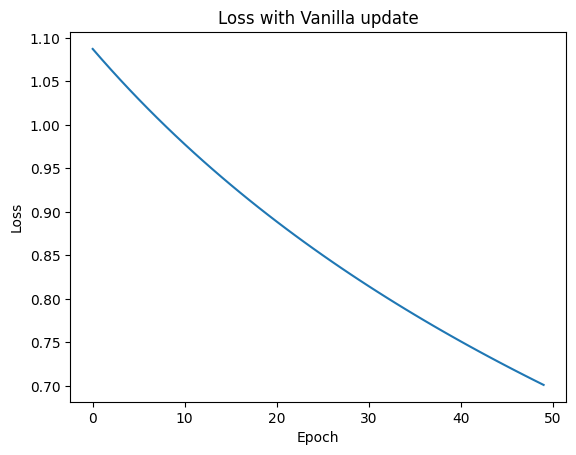

In [73]:
# plotting the loss  
plt.plot(epochs, vanilla_loss) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Loss with Vanilla update')  
plt.show() 

### <font color='blue'>2 Algorithm with Momentum update of weights</font>

In [74]:
def fit_momentum_update(x, y, w_, epochs, learning_rate, mu=0.5, v=0):
    mean_loss = []
    for _ in epochs:
        loss = []
        for xi, yi in zip(x, y):
            df = forward_propagation(xi, yi, w_)
            loss.append(df['loss'])
            dw = backward_propagation(xi, w_, df)
            
            dw = list(dw.values())
            for i, wi in enumerate(dw[::-1]):
                # Momentum update
                v = mu * v - learning_rate * wi # integrate velocity
                w_[i] += v # integrate position
        mean_loss.append(np.mean(loss))
    return mean_loss

In [75]:
momentum_loss = fit_momentum_update(X, y, W.copy(), epochs, learning_rate)

<font color='blue'> Plot between epochs and loss</font>

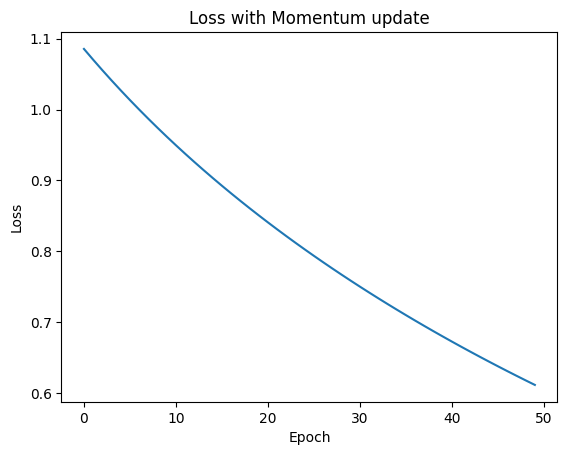

In [76]:
# plotting the loss  
plt.plot(epochs, momentum_loss) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Loss with Momentum update')  
plt.show() 

### <font color='blue'>3 Algorithm with Adam update of weights</font>

In [77]:
def fit_adam_update(x, y, w_, epochs, learning_rate):
    b1, b2, e = 0.9, 0.999, 1e-08
    m, v = 0, 0
    mean_loss = []
    for epoch in epochs:
        loss = []
        for xi, yi in zip(x, y):
            df = forward_propagation(xi, yi, w_)
            loss.append(df['loss'])
            dw = backward_propagation(xi, w_, df)
            
            dw = list(dw.values())
            epoch += 1
            for i, wi in enumerate(dw[::-1]):
                m = b1 * m + (1 - b1) * wi
                v = b2 * v + (1 - b2) * (wi**2)
    
                m_hat = m / (1 - (b1**epoch))
                v_hat = v / (1 - (b2**epoch))
                
                w_[i] += - (learning_rate * m_hat) / (math.sqrt(v_hat) + e)
        mean_loss.append(np.mean(loss))
    return mean_loss

In [78]:
adam_loss = fit_adam_update(X, y, W.copy(), epochs, learning_rate)

<font color='blue'>Plot between epochs and loss</font>

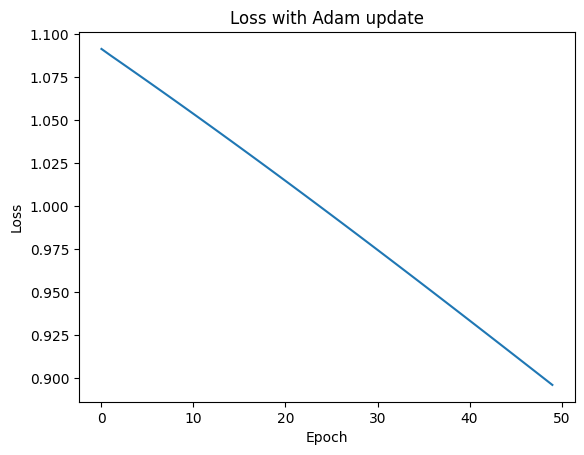

In [79]:
# plotting the loss  
plt.plot(epochs, adam_loss) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.title('Loss with Adam update')  
plt.show() 

<font color='blue'>Comparison plot between epochs and loss with different optimizers</font>

In [83]:
W = np.random.normal(0, 0.1, 9)
epochs = list(range(100))
learning_rate = 1e-5

vanilla_loss = fit_vanilla_update(X, y, W.copy(), epochs, learning_rate)
momentum_loss = fit_momentum_update(X, y, W.copy(), epochs, learning_rate)
adam_loss = fit_adam_update(X, y, W.copy(), epochs, learning_rate)

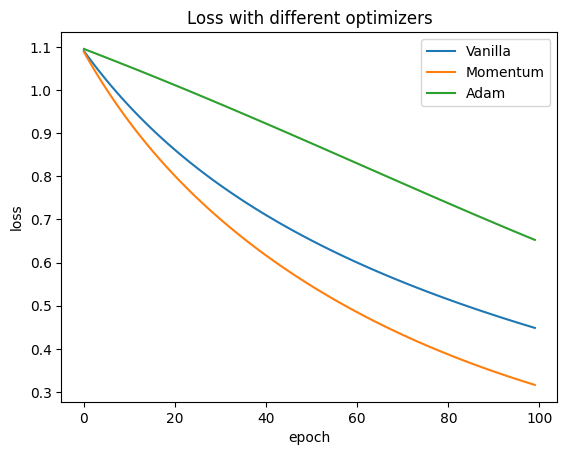

In [84]:
# summarize history for loss
plt.plot(vanilla_loss)
plt.plot(momentum_loss)
plt.plot(adam_loss)
plt.title('Loss with different optimizers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Vanilla', 'Momentum', 'Adam'], loc='upper right')
plt.show()

### Observations
1. Vanilla optimizer is relatively faster but it converges slower compared to Momentum and Adam
2. Momentum optimizer is faster in terms of convergence compared to Vanilla and Adam optimizer.
3. Adam has nice property of adaptively learning rates which results in faster convergence but as we have exp() function keeping high epochs leads to exploding gradient problem for Adam which can be prevent by keeping extra small learning rates